In [2]:
using LinearAlgebra
using Plots
using Statistics
using DataFrames
using CSV
using Clustering
using Images
using BenchmarkTools
using LowRankApprox
using StatsBase

In [64]:
using LaTeXStrings

In [3]:
include("./KM.jl")
using .KM 

In [42]:
include("./NMF.jl")
using .NMF

In [4]:
MovieData = CSV.read("MovieRankings36.csv", datarow=1);
MovieData = convert(Array,MovieData);

thread = 1 warning: only found 19 / 20 columns around data row: 36. Filling remaining columns with `missing`


In [5]:
rows = [0;1;2;3;7;10;12;15;24;28];
rows = rows .+ 1; 
columns = [0;1;2;3;4;5;7;8;9;10;12;14;15;17;18;19];
columns = columns .+ 1;
dats = Float64.(MovieData[rows,columns]);

## K-Means Clustering

Let's run a randomly initialized K-Means with three clusters on our selected dataset! 

In [34]:
R = kmnz(dats,3);

Iteration number = 1
 Norm error = 7.206247289678588
 Time elapsed =3.4515e-5
--------------------------------------------------


In [35]:
a = R.assignments; 
c = R.Centers;
a_init = R.A_int;
c_init = R.C_init;

┌ Info: Saved animation to 
│   fn = /Users/shashanksule/Documents/F2020/AMSC 808N/AMSC808N_Project2/Shashank's Code/tmp.gif
└ @ Plots /Users/shashanksule/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/shashanksule/Documents/F2020/AMSC 808N/AMSC808N_Project2/Shashank's Code/tmp.gif")
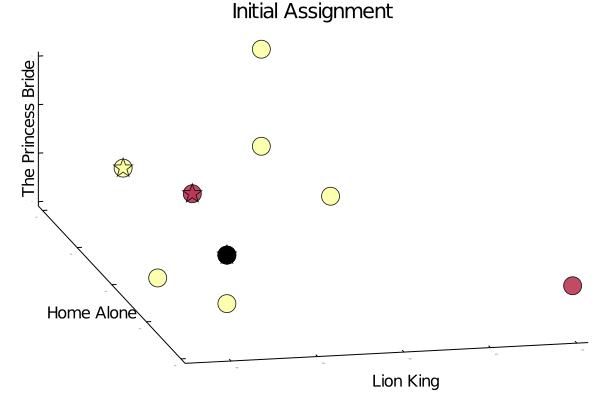

In [37]:
@gif for i=1:100
    if i <= 50
        
        scatter3d(dats[:,1],dats[:,2],dats[:,3],
         markershape = :circle,
         linealpha = 0.0,
         #xlim = (3.0,5.0), ylim = (3.0,5.0), zlim = (3.0,5.0),
         marker_z = a_init,
         markersize = 10,
         markeralpha = 0.9,
         #color=:lightrainbow, 
         gridalpha = 0.0,
         xlabel = "Home Alone",
         ylabel = "Lion King",
         zlabel = "The Princess Bride",
         #xticks = false,
         #mirror = true,
         #ticks = false,
         camera=(70,60),
         xtickfontsize = 1,
         ytickfontsize = 1,
         ztickfontsize = 1,
         legend=false,
         title="Initial Assignment");
        scatter3d!(c_init[:,1],c_init[:,2],c_init[:,3], 
           markershape = :star5, 
           markersize = 10,
           markeralpha = 0.9,
           marker_z = [1;2;3])
    else
        
        scatter3d(dats[:,1],dats[:,2],dats[:,3],
         markershape = :circle,
         linealpha = 0.0,
         #xlim = (3.0,5.0), ylim = (3.0,5.0), zlim = (3.0,5.0),
         marker_z = a,
         markersize = 10,
         markeralpha = 0.9,
         #color=:lightrainbow, 
         gridalpha = 0.0,
         xlabel = "Home Alone",
         ylabel = "Lion King",
         zlabel = "The Princess Bride",
         #xticks = false,
         #mirror = true,
         #ticks = false,
         camera=(70,60),
         xtickfontsize = 1,
         ytickfontsize = 1,
         ztickfontsize = 1,
         legend=false,
         title="Final Assignment");
        scatter3d!(c[:,1],c[:,2],c[:,3], 
           markershape = :star5, 
           markersize = 10,
           markeralpha = 0.9,
           marker_z = [1;2;3])
    end
end


## NMF's

In [39]:
SVD = svd(dats, full=false)
U = SVD.U;
S = diagm(SVD.S);
Vt = SVD.Vt;
U = U[:,1:3];
S = S[1:3,1:3];
Vt = Vt[1:3,:];

In [40]:
W_init = abs.(U);
H_init = abs.(S*Vt);

In [43]:
pgd = NMF.PGD(dats,W_init,H_init,1e-4);

Main.NMF.pgd([0.32343358777563586 0.02235958412410141 0.0; 0.32693721682443266 0.0 0.010553685086111124; … ; 0.3187961241469029 0.0 0.0; 0.22385730398339154 0.3623398422047384 0.4083538950241325], [13.576741394598987 13.455100784242553 … 10.917494359447343 8.75443830636974; 0.7627596529228539 1.2372375651625223 … 2.5118744899855328 1.18481227716476; 0.843720680880036 0.4472857969559703 … 0.5322569874115924 0.9297126357089224], [10.113743609604043, 9.593637107767016, 9.285201970700628, 9.105237754415255, 9.000903364661243, 8.940505880431155, 8.905379793137405, 8.88470364614263, 8.872261838430193, 8.864503511670788  …  7.2747584251146735, 7.274640286832649, 7.274522163186864, 7.2744040541771895, 7.274285959803496, 7.274167880065648, 7.274049814963504, 7.273931764496922, 7.273813728665755, 7.273695707469852], [250.14008793247402, 189.16805408371414, 143.45690077400062, 109.2444032056045, 83.64684837719989, 64.53436108250312, 50.31687931281634, 39.810069389768614, 32.13108980072638, 26.616

### PGD and Lee-Seung iterations

In [48]:
pgd = NMF.PGD(dats,W_init,H_init,1e-4);
ls = NMF.LS(dats, W_init, H_init);

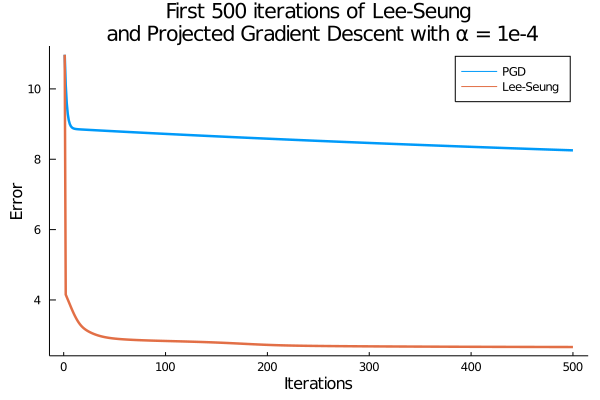

In [137]:
plot([norm(dats - W_init*H_init); pgd.err[1:499]],
     label = "PGD",
     title = "First 500 iterations of Lee-Seung\n and Projected Gradient Descent with α = 1e-4",
     title_font_size = 6,
     xlabel = "Iterations", 
     ylabel="Error", 
     gridalpha = 0.0, 
     #thickness_scaling = 1.5, 
     linewidth = 2.5);
plot!([norm(dats - W_init*H_init); ls.err[1:499]], linewidth = 2.5,
      label="Lee-Seung")

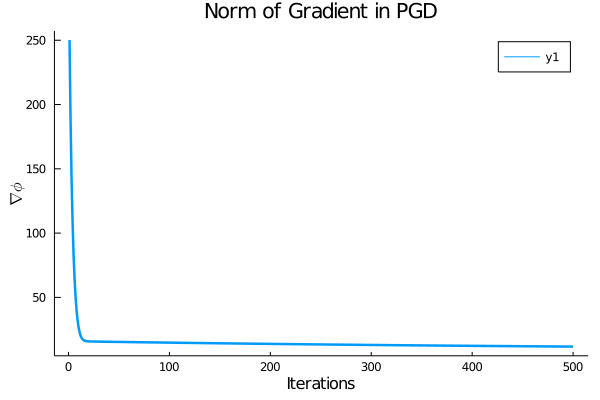

In [67]:
plot(pgd.grad[1:500], title = "Norm of Gradient in PGD",
     xlabel = "Iterations", 
     ylabel=L"\nabla \phi", 
     gridalpha = 0.0, 
     #thickness_scaling = 1.5, 
     linewidth = 2.5)

In [141]:
pgs = NMF.PGD(dats,W_init,H_init,1.0,500);
plot(pgs.err[1:500], title = "Error in PGD as a function of α",
     xlabel = "Iterations",
     ylabel = "Norm",
     #ylabel=L"\nabla \phi", 
     gridalpha = 0.0, 
     #thickness_scaling = 1.5, 
     label = "1.0",
     linewidth = 2.5)
for i=2:4
    pgs = NMF.PGD(dats,W_init,H_init,(10.0)^(-i),500);
    plot!(pgs.err, linewidth = 2.5, label = string((10.0)^(-i)))
end


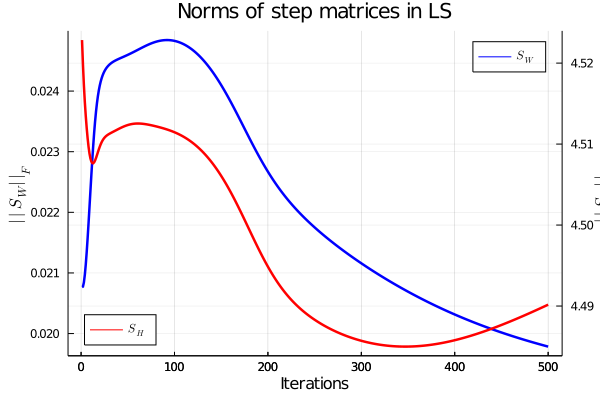

In [82]:
plot(ls.steperrW[1:500], title = "Norms of step matrices in LS", 
     xlabel = "Iterations",
     ylabel = L"||S_W||_F",
     label = L"S_W",
     color = :blue,
     legend = :topright,
     linewidth = 2.5);
plot!(twinx(),
      ls.steperrH[1:500], 
      ylabel = L"||S_H||_F",
      label = L"S_H",
      legend = :bottomleft,
      color = :red,
      linewidth = 2.5)

┌ Info: Saved animation to 
│   fn = /Users/shashanksule/Documents/F2020/AMSC 808N/AMSC808N_Project2/Shashank's Code/tmp.gif
└ @ Plots /Users/shashanksule/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/shashanksule/Documents/F2020/AMSC 808N/AMSC808N_Project2/Shashank's Code/tmp.gif")
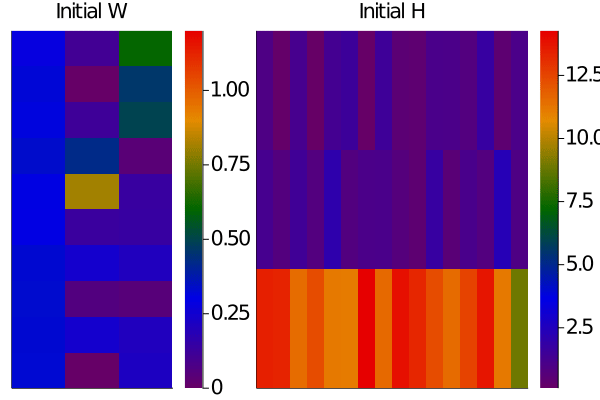

In [124]:
@gif for i = 1:100
    if i <= 50
        l = @layout [a{0.4w} b{0.6w}];
        p1 = heatmap(W_init, color = :darkrainbow, clims = (0.0,1.2),ticks = false, title = "Initial W")
        p2 = heatmap(H_init, color = :darkrainbow, xticks = false, yticks = false, title = "Initial H")
        plot(p1,p2,layout=l)
    else
        l = @layout [a{0.4w} b{0.6w}];
        p3 = heatmap(pgd.W, color = :darkrainbow, clims = (0.0,1.2), ticks = false, title = "Final W")
        p4 = heatmap(pgd.H, color = :darkrainbow, xticks = false, yticks = false, title = "Final H")
        plot(p3,p4, layout = l)
    end
end


┌ Info: Saved animation to 
│   fn = /Users/shashanksule/Documents/F2020/AMSC 808N/AMSC808N_Project2/Shashank's Code/tmp.gif
└ @ Plots /Users/shashanksule/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/shashanksule/Documents/F2020/AMSC 808N/AMSC808N_Project2/Shashank's Code/tmp.gif")
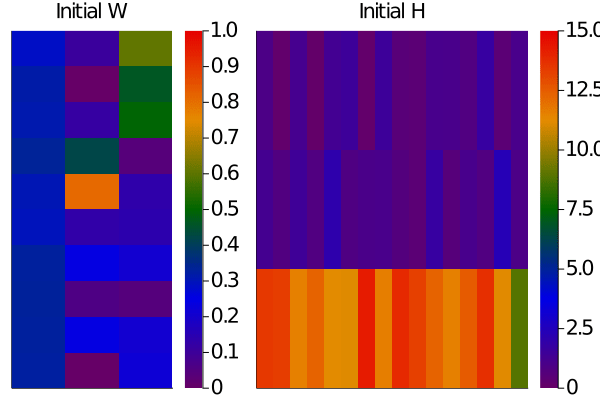

In [126]:
@gif for i = 1:100
    if i <= 50
        l = @layout [a{0.4w} b{0.6w}];
        p1 = heatmap(W_init, color = :darkrainbow, clims = (0.0,1.0), ticks = false, title = "Initial W")
        p2 = heatmap(H_init, color = :darkrainbow, clims = (0.0,15.0),xticks = false, yticks = false, title = "Initial H")
        plot(p1,p2,layout=l)
    else
        l = @layout [a{0.4w} b{0.6w}];
        p3 = heatmap(ls.W, color = :darkrainbow, clims = (0.0,1.0), ticks = false, title = "Final W")
        p4 = heatmap(ls.H, color = :darkrainbow, clims = (0.0,15.0), xticks = false, yticks = false, title = "Final H")
        plot(p3,p4, layout = l)
    end
end

### Combo 

The first combo scheme is basic: 5000 iterations of PGD, and then 5000 of LS. 

In [116]:
combo1_pgd = PGD(dats,W_init,H_init,1e-4,5000);
combo1_ls = LS(dats, combo1_pgd.W,combo1_pgd.H,5000);

The second one is a bit more refined: if stuck on the same iterate for a while (say for 100 iterations), switch over to LS. 

In [133]:
temp_W = W_init;
temp_H = H_init;
combo2_pgd = PGD(dats,temp_W,temp_H,1e-4,500);
for i = 1:5
    combo2_pgd = PGD(dats,combo2_pgd.W,combo2_pgd.H,1e-4,500);
    if norm(combo2_pgd.grad) < 1e-5 || abs(mean(combo2_pgd.err) - combo2_pgd.err[length(combo2_pgd.err)]) < 1e-8
        break
    end
end

if norm(combo2_pgd.grad) >= 1e-5
    combo2_ls = LS(dats, combo2_pgd.W,combo2_pgd.H,4000);
end

Main.NMF.ls([0.3010255953165328 0.312910896740858 0.0; 0.3474592943135662 0.0 2.599820116606774e-34; … ; 0.33686503180315347 0.0 0.0; 0.19596158913585116 0.003275633203983829 0.8300603366019187], [13.447400018872058 12.24618731120407 … 9.256717983085563 7.9033885506881365; 0.8258174514684843 1.8404870789278767 … 2.3375619621078956 2.4428731782778623; 1.593839763620785 2.043163719479111 … 2.270661120563422 0.3820453245405042], [3.613664006615107, 3.539314681889948, 3.4893589186713716, 3.4531259783417094, 3.4247090546922454, 3.4007707344719558, 3.3794526905042495, 3.359769896722105, 3.341252313699719, 3.3237184178541104  …  2.9507738676354083, 2.9507738628254936, 2.950773858032041, 2.950773853254994, 2.950773848494296, 2.9507738437498907, 2.9507738390217213, 2.9507738343097314, 2.950773829613866, 2.950773824934068], [0.019437705811613946, 0.019278950805805405, 0.0191582358558314, 0.019070313776026478, 0.01900887015657638, 0.018968779750187067, 0.018945993349010332, 0.018937262731001804, 

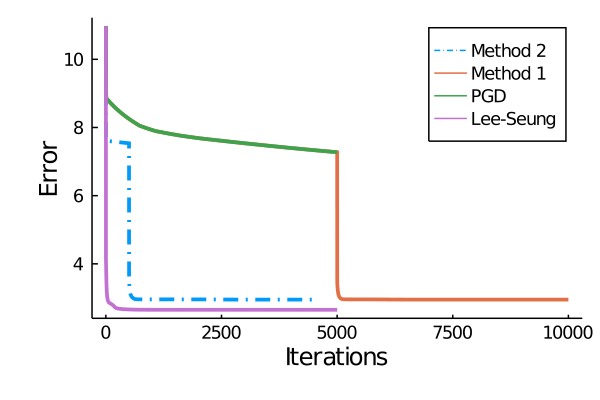

In [136]:
plot([norm(dats - W_init*H_init); combo2_pgd.err; combo2_ls.err], 
     label = "Method 2", 
     gridalpha = 0.0, 
     xlabel = "Iterations", ylabel = "Error",
     thickness_scaling = 1.5,
     linewidth=2.5,
     linestyle=:dashdot);
plot!([norm(dats - W_init*H_init); combo1_pgd.err; combo1_ls.err], 
        label = "Method 1", linewidth = 2.5, linestyle=:solid)
plot!([norm(dats - W_init*H_init); pgd.err[1:5000]],
     label = "PGD",
#      title = "First 500 iterations of Lee-Seung\n and Projected Gradient Descent",
#      title_font_size = 6,
#      xlabel = "Iterations", 
#      ylabel="Error", 
#      gridalpha = 0.0, 
#      #thickness_scaling = 1.5, 
     linewidth = 2.5)
plot!([norm(dats - W_init*H_init); ls.err[1:5000]], linewidth = 2.5,
      label="Lee-Seung")

## Matrix Completion 

### Alternating iterations

In [ ]:
M = deepcopy(MovieData);
Ω = typeof.(M) .== Float64;
M[Ω .== false] .= 0.0;
M = Float64.(M);

In [ ]:
function NMF_AI(M::Array{Float64,2}, 
                λ::Float64, 
                X_init::Array{Float64,2}, 
                Y_init::Array{Float64,2},  
                Ω::BitArray{2},
                itermax::Int64=100)
    #Input
    #M--data matrix (missing values are 0)
    #λ--regularization parameter
    #X_init, Y_init--initial X,Y such that M ≈ XYᵗ
    #Note that X_init should be n x k and Y_init should be d x k where M is n x d
    #Ω--refers to the defined entries of M  
    n = size(X_init)[1];
d = size(Y_init)[1];
X = X_init;
Y = Y_init;
res = M-X*Y';
err = [norm(res[Ω])];
time = Array{Float64,1}();
println("Initial error = ",norm(res[Ω]));
for k=1:100 
        
        Xnew = zeros(size(X));
        Ynew = zeros(size(Y));
        
        t = @elapsed begin
            #solving for X_k+1 
            for i=1:n

                #setting up Y_Ωi
                Y_Ωi = zeros(size(Y)); 
                for j=1:d
                    if Ω[i,j]
                        Y_Ωi[j,:] = Y[j,:];
                    end
                end

                #Solving for the ith row of X_k+1
                A = Y_Ωi'*Y_Ωi + λ*I;
                b = Y_Ωi'*reshape(M[i,:],(d,1));
                x = A \ b
                Xnew[i,:] = x';
            end

            X = Xnew; 

            #solving for Y_k+1
            for i=1:d

                #setting up X_Ωi
                X_Ωi = zeros(size(X)); 
                for j=1:n
                    if Ω[j,i]
                        X_Ωi[j,:] = X[j,:];
                    end
                end

                #Solving for the ith row of Y_k+1
                A = X_Ωi'*X_Ωi + λ*I;
                b = X_Ωi'*reshape(M[:,i],(n,1));
                y = A \ b;
                Ynew[i,:] = y';
            end
            end;
        
        #preparing for the next iter
        X = Xnew;
        Y = Ynew; 
        
        #diagnostics
        res = M - X*Y';
        time = push!(time, t);
        err = push!(err, norm(res[Ω]));
        println("Iteration ",k,"\n time elapsed =",t, "\n residual error =",norm(res[Ω]),
                "\n projected error =",norm(res));
        println("---------------------------------------");
    end
    
    return X,Y,err,time
end


In [ ]:
SVD = svd(M,full=false);
U = SVD.U;
Σ = diagm(SVD.S);
Vt = SVD.Vt;
X_init = abs.(U[:,1:3]);
Y_t = Σ[1:3,1:3]*Vt[1:3,:];
Y_init = Float64.(abs.(Y_t)');

In [ ]:
X,Y,err,time = NMF_AI(M,0.01,X_init,Y_init,Ω);

In [ ]:
plot(err, markershape=:circle,gridalpha = 0.0)

## Nuclear Norm minimization via SVDT

In [ ]:
function s_λ(A::Array{Float64,2},λ::Float64)
    #Input
    #A--Matrix
    #λ--singular value threshold 
    
    #Output:
    #M = U*Σλ*Vᵗ where Σλ = diagm([S - λ]₊)
    SVD = svd(A);
    k = sum(Int64.(SVD.S .> λ))
    
    Σ = diagm(SVD.S) - λ*I
    return SVD.U[:,1:k]*Σ[1:k,1:k]*SVD.Vt[1:k,:]
end
    

In [ ]:
function MatCom_NN(A::Array{Float64,2}, 
                   λ::Float64, 
                   M_init::Array{Float64,2},
                   Ω::BitArray{2},
                   itermax::Int64=100)
    #Input:
    #A--data matrix 
    #λ--regularization parameter
    #M_init--initial model (usually input as X*Yᵗ)
    #Ω--Array of defined entries 
    #itermax--max number of iterations (usually set to 100)
    M = M_init;
    res = A - M; 
    err = [norm(res[Ω])];
    time = Array{Float64,1}();
    for i=1:60
        
       t = @elapsed begin
            update = zeros(size(A));
            res = A - M;
            update[Ω] = res[Ω]; 
            M_new = s_λ(M + update, λ);
            end;
        
        #diagnostics
        
        res = A - M_new;                
        err = push!(err, norm(res[Ω]));
        time = push!(time, t);
        println("Iteration ",i,"\n time elapsed = ",t,"\n error in model = ", norm(res[Ω]),
                "\n update size = ",norm(M-M_new),"\n Update rank= ", rank(M_new));
        println("-------------------------------------");
        M = M_new;
    end
    
    return M, err, time
end


In [ ]:
M_init = X_init*Y_init'
λ = 7.0;

In [ ]:
rank(M_init)

In [ ]:
MatCom_NN(A, 7.0, )